### 讀取原始資料

In [52]:
# https://medium.com/analytics-vidhya/monte-carlo-simulations-for-predicting-stock-prices-python-a64f53585662
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/colabData/close.csv')
print(data.columns)
print(data.tail(5))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['date', '0015', '0050', '0051', '0052', '0053', '0054', '0055', '0056',
       '0057',
       ...
       '9944', '9945', '9946', '9949', '9950', '9951', '9955', '9958', '9960',
       '9962'],
      dtype='object', length=2308)
            date  0015    0050   0051    0052  ...  9951   9955   9958   9960   9962
3646  2022-01-25   NaN  141.65  58.60  133.40  ...  75.0  16.70  105.5  26.30  15.70
3647  2022-01-26   NaN  141.55  58.80  132.50  ...  74.8  16.75  106.0  26.55  15.75
3648  2022-02-07   NaN  142.30  59.95  132.70  ...  75.2  16.90  110.0  26.60  16.80
3649  2022-02-08   NaN  142.90  60.30  133.05  ...  75.2  17.10  110.5  26.65  16.95
3650  2022-02-09   NaN  143.40  60.85  134.50  ...  75.6  17.15  110.5  26.60  16.95

[5 rows x 2308 columns]


In [84]:
# get 0050
data = data.set_index(data['date'])
features = data['0050']
features = features['2018-01-03':'2022-02-09']

#data clean
features = features.interpolate(method='linear', limit_direction='forward', axis=0)

features.tail(10)

date
2022-01-18    150.30
2022-01-19    148.50
2022-01-20    149.10
2022-01-21    142.65
2022-01-24    144.00
2022-01-25    141.65
2022-01-26    141.55
2022-02-07    142.30
2022-02-08    142.90
2022-02-09    143.40
Name: 0050, dtype: float64

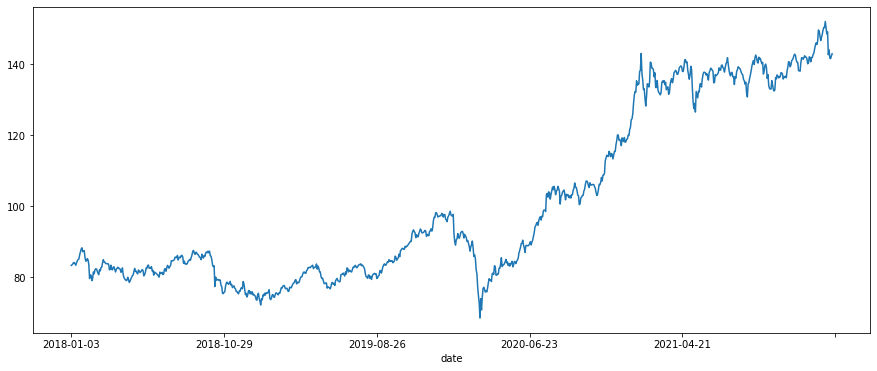

In [77]:
#Plot
features.plot(figsize=(15,6))

### Compute the logarithmic returns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

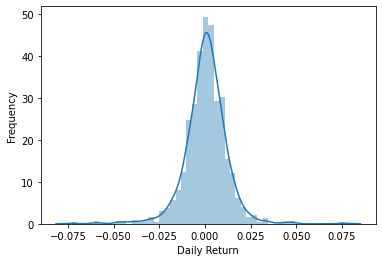

In [85]:
import numpy as np
log_returns = np.log(1 + features.pct_change())

#Plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

### Compute the Drift

In [86]:
#Drift: the direction that rates of returns have had in the past. 
#e.g. the expected return of the stock.

u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)

print(drift)

0.0004778105536158378


### Compute the Variance and Daily Returns

In [92]:
# In this step we have to generate random variables for every day forecasted and for every simulation trial we will run.
from scipy.stats import norm

stdev = log_returns.std()
days = 5
trials = 10000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift + stdev * Z)

### Calculating the stock price for every trial

In [93]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = features.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

Text(0, 0.5, 'close price')

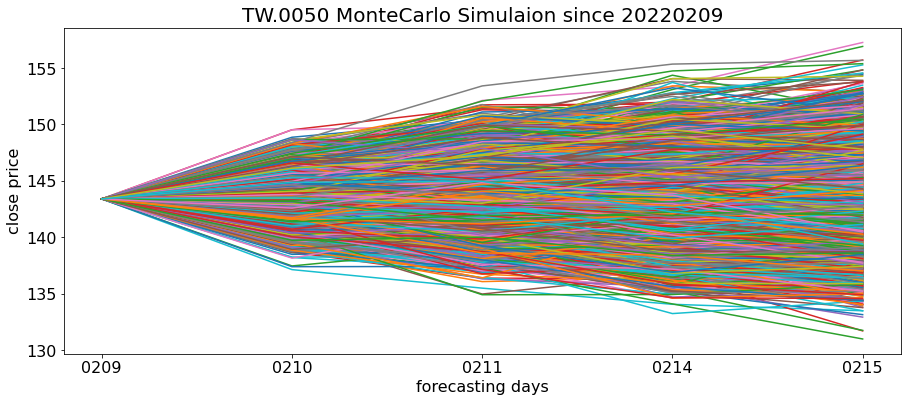

In [110]:
day = np.linspace(1,5,5)

fig = plt.figure(figsize=(15,6)) #create figure
ax = fig.add_subplot(1, 1, 1) #create ax within figure

for tryTimes in range(trials):
  ax.plot(day, price_paths[:, tryTimes])

plt.xticks(day, ['0209', '0210', '0211', '0214', '0215'], fontsize=16)
plt.yticks(fontsize=16)
plt.title("TW.0050 MonteCarlo Simulaion since 20220209", fontsize=20)
plt.xlabel("forecasting days", fontsize=16)
plt.ylabel("close price", fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


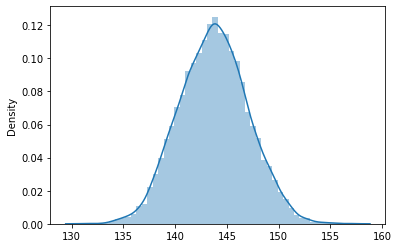

In [105]:
endPriceForTrial = price_paths[4,:]

sns.distplot(endPriceForTrial)

In [112]:
mean = endPriceForTrial.mean()
std = endPriceForTrial.std()

print("mean:", round(mean, 2))
print("std:", round(std, 2))

mean: 143.73
std: 3.32


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


143.4531276342002
1.6436091928794743


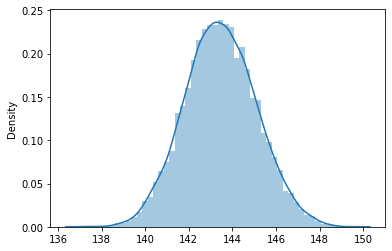

In [102]:
endPriceForTrial = price_paths[1,:]

sns.distplot(endPriceForTrial)

mean = endPriceForTrial.mean()
std = endPriceForTrial.std()

print(mean)
print(std)